# **2주차 1교시 ML 기초 과제**
Q1. Hyperparameter Tuning

Q2. airline passenger satisfaction survey 분석하기


## **Q1. Hyperparameter Tuning**

- 아래 코드는 SVM(Support Vector Machine) 모델을 사용하여 분류와 회귀 문제를 해결하며, Grid Search, Random Search, Bayesian Search를 활용하여 Hyperparameter Tuning을 수행합니다.

  - 참고 사항
    - SVM의 하이퍼파라미터는 c와 kernel입니다.
    - C: SVM 모델이 오류를 얼마나 허용할 것인지 결정합니다. C값이 클수록 오류를 허용하지 않는 Hard Margin, 작을수록 오류를 허용하는 Soft Margin이 적용됩니다. 이때, C값이 너무 크면 overfitting, 너무 작으면 underfitting이 발생할 수 있으므로 Hyperparameter Tuning을 통해 적절한 값을 찾아야 합니다.
    - kernel: 데이터 셋의 형태에 따라 다르게 정해주어야 합니다. 선형 데이터셋의 경우 'linear'를, 비선형 데이터셋은 'poly', 'rbf'을 주로 사용합니다. 이 또한, Hyperparameter Tuning을 통해 최적의 kernel을 찾아주는 것이 좋습니다.

**Data prepration**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_regression
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

# synthetic data for classification
X_cls, y_cls = make_classification(n_samples=1000, n_features=20, random_state=123)
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# synthetic data for regression
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=123)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

📌 Q1-1.
* classification 관련 코드를 참고하여 regression 부분의 각 빈칸을 채워주세요.

**1) Grid Search**
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [2]:
from sklearn.model_selection import GridSearchCV

# Grid Search for Classification
param_grid_cls = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid_cls = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_cls,
    cv=3
)

grid_cls.fit(X_cls_train, y_cls_train)
best_cls = grid_cls.best_estimator_
print("Best parameters (classification):", grid_cls.best_params_)

y_cls_pred = best_cls.predict(X_cls_test)
print("Classification Accuracy:", accuracy_score(y_cls_test, y_cls_pred))

Best parameters (classification): {'C': 1, 'kernel': 'rbf'}
Classification Accuracy: 0.995


In [3]:
# Grid Search for Regression
param_grid_reg = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid_reg = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid_reg,
    cv=3
)

grid_reg.fit(X_reg_train, y_reg_train)
best_reg = grid_reg.best_estimator_
print("Best parameters (regression):", grid_reg.best_params_)

y_reg_pred = best_reg.predict(X_reg_test)
print("Regression MSE:", mean_squared_error(y_reg_test, y_reg_pred))

Best parameters (regression): {'C': 10, 'kernel': 'linear'}
Regression MSE: 0.009701651755924497


**2) Random Search**
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [4]:
from sklearn.model_selection import RandomizedSearchCV

# Random Search for Classification
param_dist_cls = {'C': np.logspace(-3, 3, 10), 'kernel': ['linear', 'rbf']}

random_cls = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_dist_cls,
    n_iter=10,
    cv=3,
    random_state=42
)

random_cls.fit(X_cls_train, y_cls_train)
best_cls = random_cls.best_estimator_
print("Best parameters (classification):", random_cls.best_params_)

y_cls_pred = best_cls.predict(X_cls_test)
print("Classification Accuracy:", accuracy_score(y_cls_test, y_cls_pred))

Best parameters (classification): {'kernel': 'rbf', 'C': 2.154434690031882}
Classification Accuracy: 0.985


In [5]:
# Random Search for Regression
param_dist_reg = {'C': np.logspace(-3, 3, 10), 'kernel': ['linear', 'rbf']}

random_reg = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions=param_dist_reg,
    n_iter=10,
    cv=3,
    random_state=42
)

random_reg.fit(X_reg_train, y_reg_train)
best_reg = random_reg.best_estimator_

print("Best parameters (regression):", random_reg.best_params_)
y_reg_pred = best_reg.predict(X_reg_test)
print("Regression MSE:", mean_squared_error(y_reg_test, y_reg_pred))

Best parameters (regression): {'kernel': 'linear', 'C': 1000.0}
Regression MSE: 0.009799425412585683


**3) Bayesian Search**
* 참고: https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html#skopt.BayesSearchCV

In [6]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.4 MB/s eta 0:00:00


In [8]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical


# Bayesian Search for Classification
param_space_cls = {
    'C': Real(1e-3, 1e3, prior='log-uniform'),
    'kernel': Categorical(['linear', 'rbf']),
}

bayes_cls = BayesSearchCV(
    estimator=SVC(),
    search_spaces=param_space_cls,
    n_iter=20,
    cv=3,
    random_state=42
)
bayes_cls.fit(X_cls_train, y_cls_train)

print("Best parameters (classification):", bayes_cls.best_params_)
y_cls_pred = bayes_cls.best_estimator_.predict(X_cls_test)
print("Classification Accuracy:", accuracy_score(y_cls_test, y_cls_pred))

Best parameters (classification): OrderedDict([('C', 5.0405293861834055), ('kernel', 'rbf')])
Classification Accuracy: 0.98


In [10]:
# Bayesian Search for Regression
param_space_reg = {
    'C': Real(1e-3, 1e3, prior='log-uniform'),
    'kernel': Categorical(['linear', 'rbf']),
}

bayes_reg = BayesSearchCV(
    estimator=SVR(),
    search_spaces=param_space_reg,
    n_iter=10,
    cv=3,
    random_state=42
)
bayes_reg.fit(X_reg_train, y_reg_train)

print("Best parameters (regression):", bayes_reg.best_params_)
y_reg_pred = bayes_reg.best_estimator_.predict(X_reg_test)
print("Regression MSE:", mean_squared_error(y_reg_test, y_reg_pred))

Best parameters (regression): OrderedDict([('C', 62.7076678988192), ('kernel', 'linear')])
Regression MSE: 0.009774752388155967


📌 Q1-2. 세 가지 하이퍼파라미터 튜닝 방법의 결과가 동일하게 나왔는지 확인하고, 만약 다르다면 어떤 점에서 차이가 있었는지 서술하세요. 또한, 실행 시간과 성능 등을 고려했을 때 가장 효과적인 방법이 무엇인지 적어주세요.

추가적으로, 각 방법의 특징과 원리를 설명하고, 장단점을 비교하여 정리해 주셔도 좋습니다!

답안: 하이퍼파라미터 튜닝 방법에는 Grid Search, Random Search, Bayesian Optimization이 있다.
위 실습에서 정확도는 Grid Search, Random Search, Bayesian 순으로 높고, mse개 모두 약 0.0097로 비슷한 수준이었다.

Grid Search는 미리 정한 하이퍼파라미터 조합을 모두 탐색하는 방법으로, 최적의 조합을 보장하지만 연산량이 많아 비효율적이다. 반면, Random Search는 랜덤으로 하이퍼파라미터를 선택하여 탐색하며, Grid Search보다 빠르고 중요한 변수의 최적값을 찾을 확률이 높다. 하지만 모든 최적 조합을 시도하는 것은 아니므로 한계가 있다. Bayesian Optimization은 이전 탐색 결과를 바탕으로 확률 모델을 만들고, 최적의 조합을 효율적으로 찾는다. 적은 탐색 횟수로도 좋은 성능을 얻을 가능성이 높지만, 구현이 복잡하고 계산량이 많다.

Grid Search는 탐색 공간이 작을 때 유리하며, Random Search는 탐색 속도가 빠르다. Bayesian Optimization은 최적값을 효과적으로 찾을 수 있어 일반적으로 가장 적절한 방법이다. 실전에서는 Random Search로 대략적인 최적값을 찾고, Bayesian Optimization으로 정밀하게 조정하는 전략이 효과적이다.

## **Q2. airline passenger satisfaction survey 분석하기**

- 아래 코드는 'airline passenger satisfaction survey' dataset을 분석하고, Random Froest 모델을 학습시켜 성능을 평가합니다.
- 세션에서 배운 Normalization, Cross-validation, Confusion Matrix 등의 개념이 포함되어 있습니다.
- 과정을 천천히 따라오면서 답안을 작성해주세요!

**1) Data description**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

In [12]:
from google.colab import drive

In [13]:
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# 본인 데이터 저장 경로에 맞춰 수정하기

data = pd.read_csv("/content/drive/MyDrive/투빅스/과제물/week2/airline passenger satisfaction.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [16]:
data.shape

(103904, 25)

In [17]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [19]:
# 각 column 별로 고유한 값의 개수 확인
data.nunique()

,0
Unnamed: 0,103904
id,103904
Gender,2
Customer Type,2
Age,75
Type of Travel,2
Class,3
Flight Distance,3802
Inflight wifi service,6
Departure/Arrival time convenient,6


In [20]:
# 결측값 확인
data.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [21]:
# y값으로 지정할 'satisfactions' 변수 확인
satisfactions = data.satisfaction.unique().tolist()
print(satisfactions)
print("Number of neutral or dissatisfied: {}".format(data[data.satisfaction == 'neutral or dissatisfied'].shape[0]))
print("Number of satisfied: {}".format(data[data.satisfaction == 'satisfied'].shape[0]))

['neutral or dissatisfied', 'satisfied']
Number of neutral or dissatisfied: 58879
Number of satisfied: 45025


**2) Preprocessing**

In [22]:
# Uninformative Variables 삭제하기
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('id', axis=1)

# 'Arrival Delay in Minutes' 열 결측값 채우기
imp = SimpleImputer(strategy='median')
data[['Arrival Delay in Minutes']] = imp.fit_transform(data[['Arrival Delay in Minutes']])

📌 Q2-1. Encoding
* 분석을 위해 범주형 변수들은 모두 Encoding을 해주어야 합니다.
* 'Gender' 열 encoding을 참고하여 나머지 변수들을 Encoding해주세요.
* Hint: 위의 코드를 참고하여 범주형 변수가 무엇인지 확인하고, 열에서 고유한 값이 2개이면 label encoder, 3개 이상이면 onehot encoder를 사용해보세요.
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [23]:
# 'Gender' 열 encoding
data['Gender'].value_counts()

,count
Gender,
Female,52727
Male,51177


In [24]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
print("Classes:", encoder.classes_)

Classes: ['Female' 'Male']


In [25]:
# Customer Type 열 encoding
data['Customer Type'].value_counts()

,count
Customer Type,
Loyal Customer,84923
disloyal Customer,18981


In [26]:
encoder = LabelEncoder()
data['Customer Type'] = encoder.fit_transform(data['Customer Type'])
print("Classes:", encoder.classes_)

Classes: ['Loyal Customer' 'disloyal Customer']


In [27]:
# Type of Travel 열 encoding
data['Type of Travel'].value_counts()

,count
Type of Travel,
Business travel,71655
Personal Travel,32249


In [28]:
encoder = LabelEncoder()
data['Type of Travel'] = encoder.fit_transform(data['Type of Travel'])
print("Classes:", encoder.classes_)

Classes: ['Business travel' 'Personal Travel']


In [29]:
# Class 열 encoding
data['Class'].value_counts()

,count
Class,
Business,49665
Eco,46745
Eco Plus,7494


In [30]:
encoder = OneHotEncoder()
data['Class'] = encoder.fit_transform(data[['Class']]).toarray()
print("Classes:", encoder.categories_)

Classes: [array(['Business', 'Eco', 'Eco Plus'], dtype=object)]


In [31]:
# satisfaction 열 encodeing
data['satisfaction'].value_counts()

,count
satisfaction,
neutral or dissatisfied,58879
satisfied,45025


In [32]:
encoder = LabelEncoder()
data['satisfaction'] = encoder.fit_transform(data['satisfaction'])
print("Classes:", encoder.classes_)

Classes: ['neutral or dissatisfied' 'satisfied']


Train-Test split

In [33]:
X = data.drop(data.columns[-4], axis=1)
y = data.iloc[:,-4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)

(83123, 22)
(20781, 22)


📌 Q2-2. Normalization

* StandardScaler를 사용합니다.
* StandardScaler는 train data의 평균과 표준편차를 학습한 후, 이를 test data에 동일하게 적용해야 합니다.
* 이에 맞게 빈칸을 채워주세요.

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
X_train_data = pd.DataFrame(X_train, columns=X.columns)
X_train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,-0.987150,-0.473171,1.299867,1.488528,-0.954673,-0.143103,0.956377,1.271553,0.887405,-1.549472,...,1.185329,-1.017279,-1.074922,0.491774,-0.532883,1.339119,-1.395033,-0.074078,-0.312457,-0.873127
1,-0.987150,2.113400,0.043551,-0.671805,1.047479,-0.438007,0.956377,0.616850,0.887405,-0.766108,...,1.185329,-1.768222,0.478625,-1.029881,0.313521,-0.241843,1.157994,0.107766,0.355401,-0.873127
2,1.013017,-0.473171,1.696598,1.488528,-0.954673,-0.808142,-0.549931,-0.037854,-0.542403,-1.549472,...,-1.846677,-1.768222,1.255399,0.491774,1.159924,1.339119,1.157994,-0.385812,-0.389518,-0.873127
3,-0.987150,-0.473171,2.027207,1.488528,-0.954673,1.053565,0.203223,1.271553,0.172501,0.800620,...,0.427327,1.235552,1.255399,-0.269054,1.159924,-0.241843,1.157994,-0.385812,-0.389518,-0.873127
4,-0.987150,2.113400,-0.948277,-0.671805,-0.954673,0.169856,-0.549931,-0.692557,-0.542403,0.017256,...,-1.846677,-1.768222,-1.851695,-1.029881,-0.532883,1.339119,-1.395033,-0.307879,-0.004215,-0.873127


**3) Modeling**

📌 Q2-3. Hyperparameter Tuning

* Random Forest 모델을 이용하며, Grid Search를 이용하여 적절한 하이퍼파라미터를 찾습니다.
* Q1의 Hyperparameter Tuning을 참고하여 아래 빈칸을 채워주세요.

In [37]:
rf = RandomForestClassifier(random_state=42)

# Grid Search
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("Best hyperparameters for RandomForest:", grid_rf.best_params_)

Best hyperparameters for RandomForest: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}


📌 Q2-4. k-fold
* k-fold를 이용하여 **train set에서 5-CV**를
수행하도록 빈칸을 채워주세요.
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [38]:
kfold = KFold(n_splits = 5, shuffle=True, random_state=123)
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=kfold, scoring="accuracy")

print(f"Accuracy for each fold: {cv_scores}")
print(f"Max score of RF: {cv_scores.max():.4f}, Mean score of RF: {cv_scores.mean():.4f} (std: {cv_scores.std():.4f})")

Accuracy for each fold: [0.71825564 0.71157895 0.71675188 0.717577   0.71198268]
Max score of RF: 0.7183, Mean score of RF: 0.7152 (std: 0.0029)


**4) Evaluation**

📌 Q2-5.
* 모델을 **test set**에 적용하고, 성능을 평가합니다.
* 빈칸도 알맞게 채워 classification report, confusion matrix, ROC curve를 출력하고 결과를 해석해주세요.
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html



In [39]:
best_rf.fit(X_train, y_train)
pred = best_rf.predict(X_test)

accuracy = np.round(accuracy_score(y_test, pred),4)
best_rf_cm = confusion_matrix(y_test, pred)

print("Accuracy : {}".format(np.round(accuracy,4)))
print(classification_report(y_test, pred))

Accuracy : 0.7095
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.79      0.76      0.77      2642
           2       0.83      0.79      0.81      3181
           3       0.65      0.66      0.65      4864
           4       0.65      0.70      0.68      5409
           5       0.73      0.69      0.71      4684

    accuracy                           0.71     20781
   macro avg       0.77      0.77      0.77     20781
weighted avg       0.71      0.71      0.71     20781



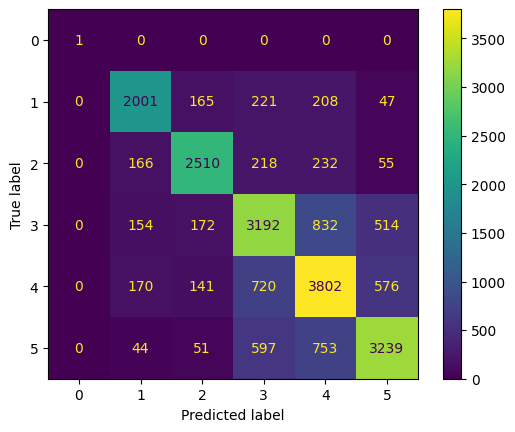

In [40]:
best_disp = ConfusionMatrixDisplay(confusion_matrix=best_rf_cm, display_labels=best_rf.classes_)
best_disp.plot()
plt.show()

In [48]:
def roc_plot(X, y, model):
    pred = model.predict(X)
    pred_positive = model.predict_proba(X)[:,1]
    fprs, tprs, threshold = roc_curve(y, pred_positive)
    auc = roc_auc_score(y,pred).round(3)
    plt.figure(figsize=(6,5))
    plt.plot([0,1],label='Standard')
    plt.plot(fprs, tprs, label='ROC')
    plt.text(0.81,0.22,"AUC:{}".format(auc))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.grid()
    plt.show()

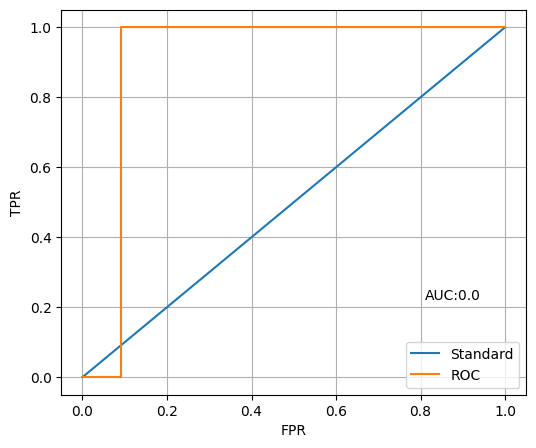

In [54]:
from sklearn.preprocessing import label_binarize

# 다중 클래스를 이진화 (One-vs-Rest 방식)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))

roc_plot(X=X_test, y=y_test_bin[:, 0], model=best_rf)

답안:

2주차 1교시 과제는 여기까지입니다. 수고하셨습니다☺️